In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()
# Links:
# https://www.kaggle.com/competitions/titanic — competition page
# https://habr.com/ru/company/mlclass/blog/270973/ — Титаник на Kaggle: вы не дочитаете этот пост до конца
# https://habr.com/ru/post/663414/ — Работа с отсутствующими значениями в Pandas
# https://www.encyclopedia-titanica.org — external info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Looking for NA-values
for column in data_train.columns:
    print(column, data_train[data_train[column].isnull()]['PassengerId'].count())
# Age: 177, Cabin: 687, Embarked: 2
# There are many more missing values in "Cabin" column than indicated.

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [5]:
# It's obvious that majority of people got departure from Southampton, so we can
# safely replace 2 NA values with "S"
data_train.loc[(data_train['Embarked'].isnull()), 'Embarked'] = 'S'

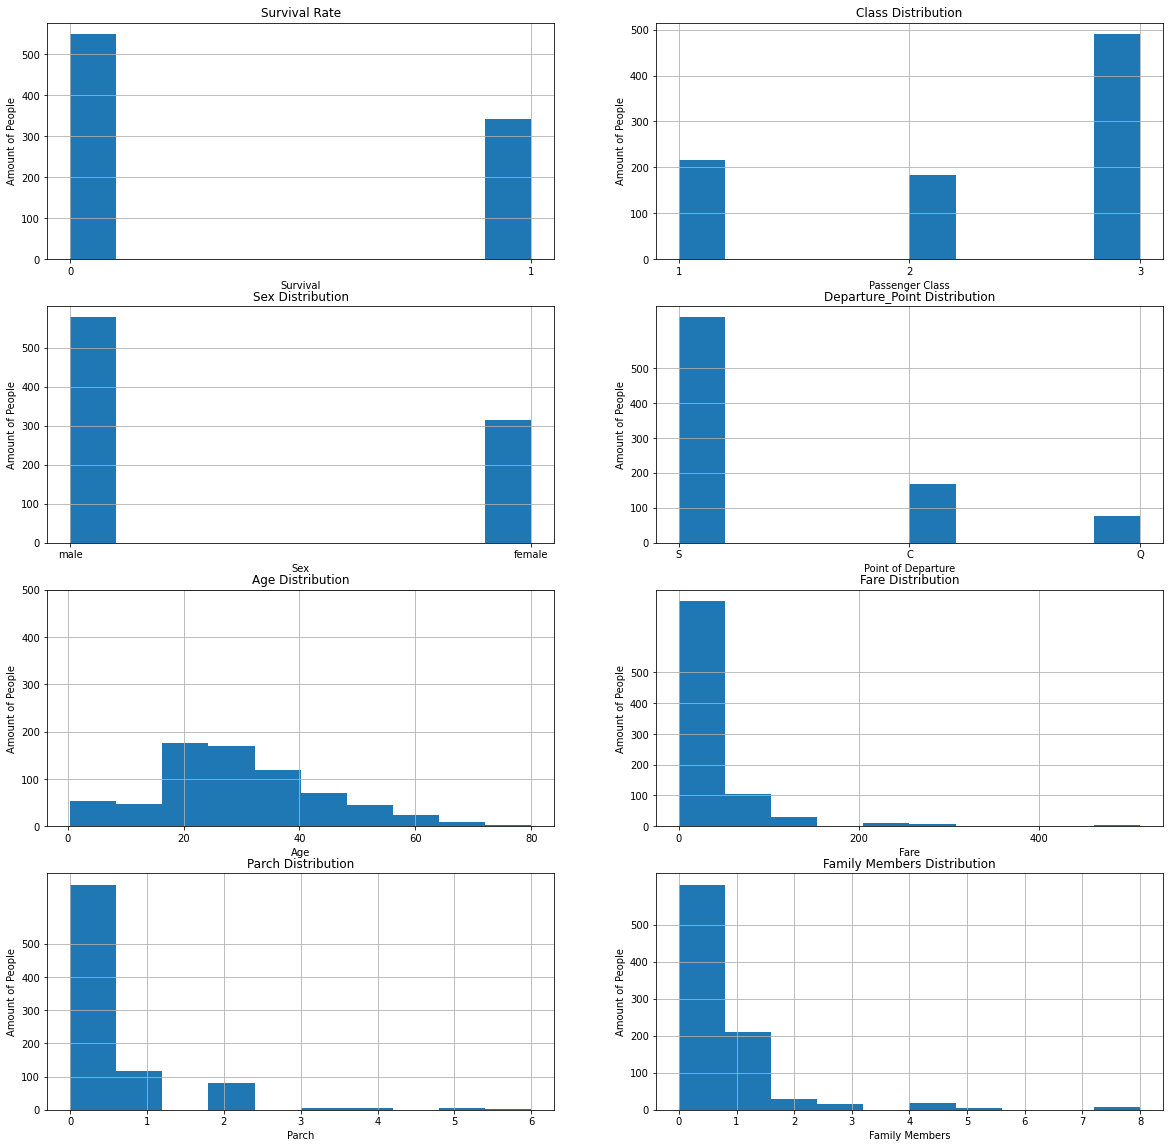

In [6]:
# Let's take a look on the known statistics
plt.figure(figsize=(20, 20))

# 1. Survival rate (Quantity / Survival)
plt.subplot(4, 2, 1)
plt.hist(data_train['Survived'])
plt.xticks(np.unique(data_train['Survived']))
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Survival")
plt.ylabel("Amount of People")
plt.title("Survival Rate")
plt.grid()

# 2. Class distribution (Quantity / Passenger Class)
plt.subplot(4, 2, 2)
plt.hist(data_train['Pclass'])
plt.xticks(np.unique(data_train['Pclass']))
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Passenger Class")
plt.ylabel("Amount of People")
plt.title("Class Distribution")
plt.grid()

# 3. Sex distribution (Quantity / Passenger Sex)
plt.subplot(4, 2, 3)
plt.hist(data_train['Sex'])
plt.xticks(np.unique(data_train['Sex']))
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Sex")
plt.ylabel("Amount of People")
plt.title("Sex Distribution")
plt.grid()

# 4. Point of departure distribution (Quantity / Point of Departure)
plt.subplot(4, 2, 4)
plt.hist(data_train['Embarked'])
plt.xticks(np.unique(data_train['Embarked']))
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Point of Departure")
plt.ylabel("Amount of People")
plt.title("Departure_Point Distribution")
plt.grid()

# 5. Age distribution (Quantity / Age)
plt.subplot(4, 2, 5)
plt.hist(data_train['Age'])
plt.xticks([0, 20, 40, 60, 80])
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Age")
plt.ylabel("Amount of People")
plt.title("Age Distribution")
plt.grid()

# 6. Fare distribution (Quantity / Fare)
plt.subplot(4, 2, 6)
plt.hist(data_train['Fare'])
plt.xticks([0, 200, 400])
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Fare")
plt.ylabel("Amount of People")
plt.title("Fare Distribution")
plt.grid()

# 7. Parch distribution (Quantity / Parch)
plt.subplot(4, 2, 7)
plt.hist(data_train['Parch'])
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Parch")
plt.ylabel("Amount of People")
plt.title("Parch Distribution")
plt.grid()

# 8. Family_Members distribution (Quantity / SibSp)
plt.subplot(4, 2, 8)
plt.hist(data_train['SibSp'])
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Family Members")
plt.ylabel("Amount of People")
plt.title("Family Members Distribution")
plt.grid()

plt.show()

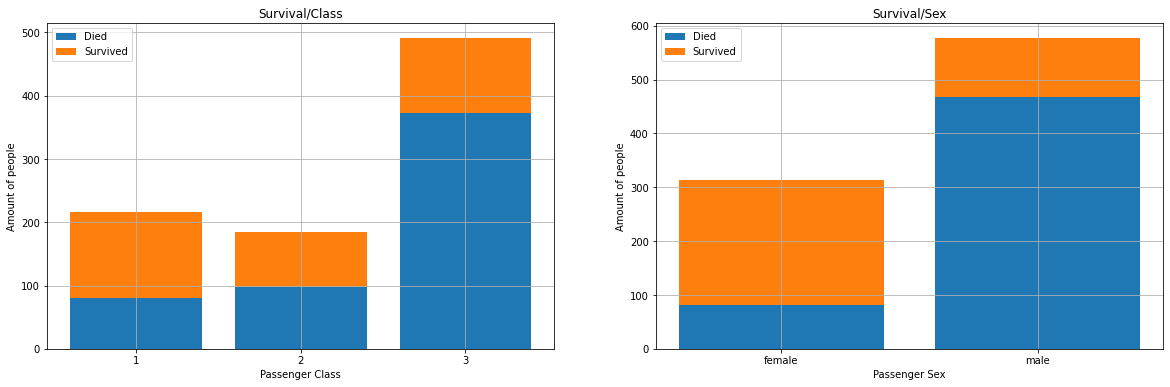

In [7]:
# Let's check hypothesis: the higher the class of the cabin, the greater the likelihood of survival
# (Here the higher class == the lower it's number (1 is higher than 2 and so on))
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(data_train[data_train['Survived'] == 0].Pclass.value_counts().sort_index().index,
        data_train[data_train['Survived'] == 0].Pclass.value_counts().sort_index(),
        label = "Died")
plt.bar(data_train[data_train['Survived'] == 1].Pclass.value_counts().sort_index().index,
        data_train[data_train['Survived'] == 1].Pclass.value_counts().sort_index(),
        bottom=data_train[data_train['Survived'] == 0].Pclass.value_counts().sort_index(),
        label = "Survived")
plt.xticks(data_train[data_train['Survived'] == 0].Pclass.value_counts().index)
plt.yticks([0, 100, 200, 300, 400, 500])
plt.xlabel("Passenger Class")
plt.ylabel("Amount of people")
plt.title("Survival/Class")
plt.legend(loc="upper left")
plt.grid()
# Also let's check: there are more women survived than a man
plt.subplot(1, 2, 2)
plt.bar(data_train[data_train['Survived'] == 0].Sex.value_counts().sort_index().index,
        data_train[data_train['Survived'] == 0].Sex.value_counts().sort_index(),
        label = "Died")
plt.bar(data_train[data_train['Survived'] == 1].Sex.value_counts().sort_index().index,
        data_train[data_train['Survived'] == 1].Sex.value_counts().sort_index(),
        bottom=data_train[data_train['Survived'] == 0].Sex.value_counts().sort_index(),
        label = "Survived")
plt.xticks(data_train[data_train['Survived'] == 0].Sex.value_counts().index)
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.xlabel("Passenger Sex")
plt.ylabel("Amount of people")
plt.title("Survival/Sex")
plt.legend(loc="upper left")
plt.grid()

plt.show()

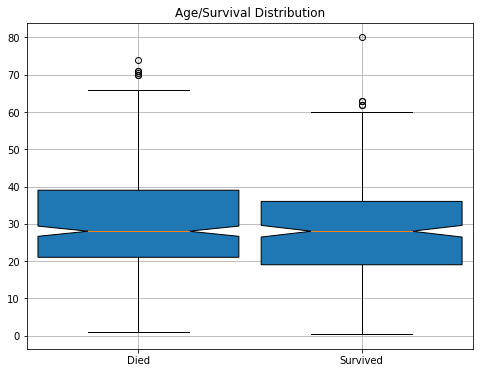

In [8]:
# Let's also check, is age connected with survival rate
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   
plt.figure(figsize=(8, 6))
plt.boxplot([data_train[(-data_train.Age.isnull()) & (data_train['Survived'] == 0)]['Age'],
             data_train[(-data_train.Age.isnull()) & (data_train['Survived'] == 1)]['Age']],
            patch_artist=True,
            notch=True,
            widths=0.9,
            labels = ['Died', 'Survived'])
plt.title("Age/Survival Distribution")
plt.grid()
plt.show()

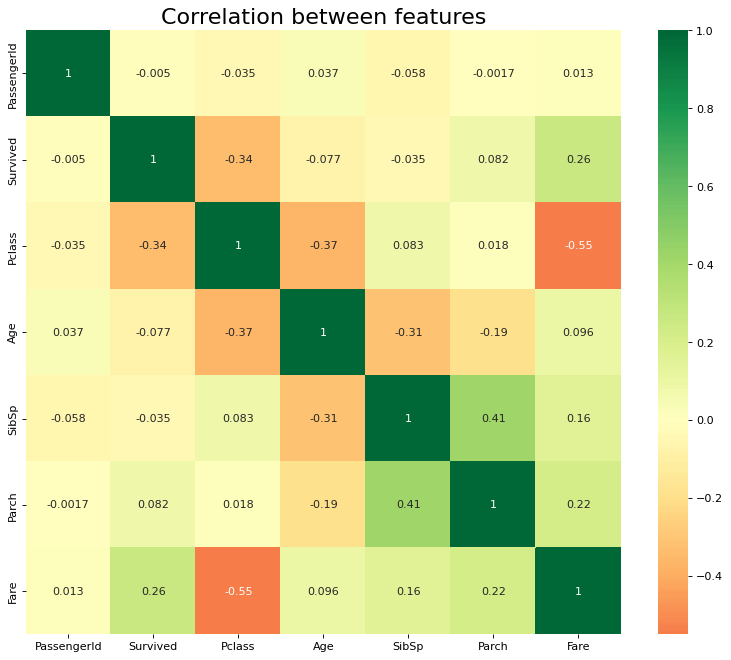

In [9]:
# Let's check correlation between different features
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_train.corr(), 
            xticklabels=data_train.corr().columns, 
            yticklabels=data_train.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)
plt.title("Correlation between features", fontsize=20)
plt.show()

1. There is very weak correlation between Survival and Age (-0.077): we showed it at the previous boxplot.
2. There is strong correlation between Survival and Passenger_Class (-0.34): we predicted it and showed with histogram
3. We can see obvious correlation between Fare and Passenger_Class (-0.55).
4. Also correlation between Age and Passenger_Class seems to be obvious (-0.37).

In [10]:
# Let's make new feature, called "Honorific", that will return person's honorific from his "Name":
data_train["Honorific"] = data_train["Name"].apply(lambda row: row[row.find(",")+2:row.find(".")])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
print(data_train.Honorific.describe())
print(data_train.groupby("Honorific").mean()['Age'])

count     891
unique     17
top        Mr
freq      517
Name: Honorific, dtype: object
Honorific
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [13]:
print(data_train.groupby("Honorific").count()['Age'])

Honorific
Capt              1
Col               2
Don               1
Dr                6
Jonkheer          1
Lady              1
Major             2
Master           36
Miss            146
Mlle              2
Mme               1
Mr              398
Mrs             108
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Age, dtype: int64


1. **Master** (avg = '4.57', cnt = '36') — XIX-th century honorific for male children.
2. **Miss** (avg = '21,77', cnt = '146') — XIX-th century honorific for unmarried women (generally young girls).

We can use honorifics to get more correct age distribution in narrow groups.

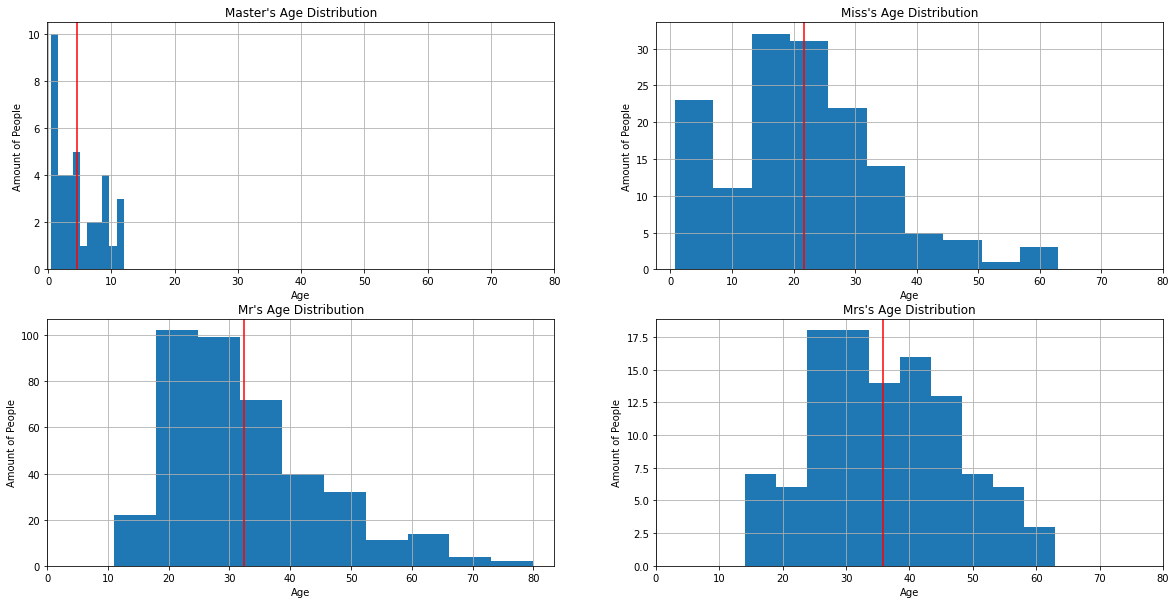

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(data_train[data_train.Honorific == 'Master'].Age)
plt.axvline(x=data_train.groupby("Honorific").mean()['Age']['Master'], color='r')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.title('Master\'s Age Distribution')
plt.grid()

plt.subplot(2, 2, 2)
plt.hist(data_train[data_train.Honorific == 'Miss'].Age)
plt.axvline(x=data_train.groupby("Honorific").mean()['Age']['Miss'], color='r')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.title('Miss\'s Age Distribution')
plt.grid()

plt.subplot(2, 2, 3)
plt.hist(data_train[data_train.Honorific == 'Mr'].Age)
plt.axvline(x=data_train.groupby("Honorific").mean()['Age']['Mr'], color='r')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.title('Mr\'s Age Distribution')
plt.grid()

plt.subplot(2, 2, 4)
plt.hist(data_train[data_train.Honorific == 'Mrs'].Age)
plt.axvline(x=data_train.groupby("Honorific").mean()['Age']['Mrs'], color='r')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Amount of People')
plt.title('Mrs\'s Age Distribution')
plt.grid()

plt.show()

In [23]:
# Let's see, which classes have missing values in column "Age"
data_train[data_train.Age.isnull()].groupby('Honorific').count()['PassengerId']

Honorific
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
Name: PassengerId, dtype: int64

For "Master", "Miss", "Mr" and "Mrs" we can use average values. But we haven't enough values for "Dr".

Probably, we haven't another variant, but let's check specifically them. 

In [25]:
data_train[data_train.Honorific == "Dr"]
# Okay, that was simple. Just google his name and you will find his Age:
# https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


In [32]:
data_train.loc[data_train.PassengerId == 767, 'Age'] = round(45 + 7/12, 1)
data_train[data_train.PassengerId == 767]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,45.6,0,0,112379,39.6,NaN,C,Dr


In [33]:
# Other passenger's missed ages we can take from honorific/age distribution:
for title in ['Master', 'Miss', 'Mr', 'Mrs']:
    data_train.loc[(data_train.Honorific == title) & (data_train.Age.isnull()), 'Age'] = \
                                                                                data_train.groupby("Honorific").mean()['Age'][title]

data_train.Age.count()

891

In [41]:
data_train['Fare'].value_counts()[0.0]
# We have 15 free tickets. Why?
data_train[data_train['Fare'] == 0]
# They are not children or cmth like that

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
179,180,0,3,"Leonard, Mr. Lionel",male,36.00000,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.00000,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00000,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.36809,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00000,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,32.36809,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,32.36809,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.36809,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.00000,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.36809,0,0,112052,0.0,NaN,S,Mr


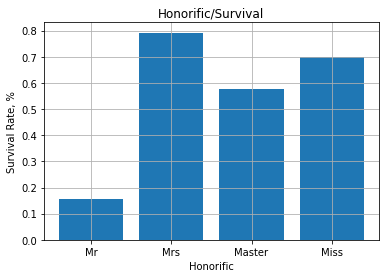

In [66]:
# Let's see, how much people in main groups are survived
survival_rate = data_train[data_train.Survived == 1].groupby('Honorific').count().Survived / data_train.groupby('Honorific').count().Survived[['Master', 'Miss', 'Mr', 'Mrs']]
survival_rate = survival_rate[['Mr', 'Mrs', 'Master', 'Miss']]

plt.bar(survival_rate.index, survival_rate)
plt.xlabel('Honorific')
plt.ylabel('Survival Rate, %')
plt.title('Honorific/Survival')
plt.grid()

plt.show()
# We see that a lot of women and children survived.

https://habr.com/ru/company/mlclass/blog/270973/
* Продолжение - построение моделей.
